In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 5000)

In [4]:
def get_player(playerid, matchId):
    path='data/events/'+str(matchId)+'.json'
    with open(path, 'r', encoding='utf-8') as f:
        rd = f.read()
    rd=rd[28:-2]
    obj = json.loads(rd)
    dfw = pd.json_normalize(obj)
    dfw=dfw[dfw['player.id']==playerid]
    return dfw['player.name'].iloc[0], dfw['team.name'].iloc[0]  ,dfw['matchId'].iloc[0]

Striker: Harry Kane 8717, Z. Amdouni 614755
Winger: R.Vargas 511155 , E. Hazard 25707
Midfield: KDB 38021, G.Xhaka 49876
Defender: Van dijk 370, akanji 297957
Fullback. J. Cancelo 135903 , R. rodriguez 14922

In [6]:
eventpath='data/events/'
rankpath='ranking/final/'
name='dribbler'

In [ ]:
pd.read_csv(rankpath+'ranking_fb_def.csv')

In [296]:
df=pd.read_csv(rankpath+'ranking_st_fa9.csv')
df3=pd.read_csv(rankpath+'ranking_st_target.csv')

In [297]:
df2=pd.read_csv(rankpath+'ranking_st_box.csv')
df4=pd.read_csv(rankpath+'ranking_mi_dpl.csv')

In [298]:
id=614755
df=df[df['playerId']==id]
df=df.sort_values(by='matchId')

In [299]:
df2=df2[df2['playerId']==id]
df2=df2.sort_values(by='matchId')

In [300]:
df3=df3[df3['playerId']==id]
df3=df3.sort_values(by='matchId')
df4=df4[df4['playerId']==id]
df4=df4.sort_values(by='matchId')

In [301]:
df['box']=np.array(df2['box'])

In [302]:
df['target']=np.array(df3['target'])

In [303]:
df.to_csv('rating_amdouni.csv')

In [188]:
rank=df.sort_values(by=name, ascending=False)

In [ ]:
for i in range (50):
    pid=rank['playerId'].iloc[i]
    mid=rank['matchId'].iloc[i]
    player, team , match = get_player(pid,mid)
    r=rank[name].iloc[i]
    print(pid)
    print(player, '&', team, '&', match, '&', round(r,2))

In [485]:
m=pd.read_csv('ranking/final/ranking_mi_opl.csv')
m1=pd.read_csv('ranking/final/ranking_mi_off.csv')
m2=pd.read_csv('ranking/final/ranking_mi_def.csv')
m3=pd.read_csv('ranking/final/ranking_mi_dpl.csv')

In [486]:
mean1=m['off_playmaker'].median()
mean2=m1['offensive'].median()
mean3=m2['defensive'].median()
mean4=m3['def_playmaker'].median()
print(mean1)
print(mean2)
print(mean3)
print(mean4)

18.896234853482287
23.977875704438365
21.404517965620425
24.107655150842355


In [15]:
result=pd.read_csv('rating_vargas.csv')

In [ ]:
result

In [16]:
result=result[result['seasonId']!=21316]

32.32502240617579
44.64238219249855
40.96080834951432
42.1425649048881


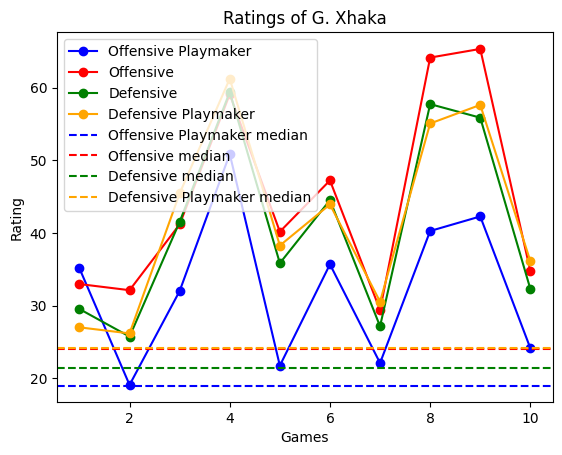

In [490]:
# Example data for three vectors (data_points1, data_points2, data_points3)
data_points1 = np.array(result['off_playmaker'])
data_points2 = np.array(result['offensive'])
data_points3 = np.array(result['defensive'])
data_points4 = np.array(result['def_playmaker'])
print(data_points1.mean())
print(data_points2.mean())
print(data_points3.mean())
print(data_points4.mean())

# Generate x-axis values (game numbers)
games = range(1, len(data_points1) + 1)

# Plot the data points for each vector with different colors and connect them
plt.plot(games, data_points1, marker='o', linestyle='-', color='blue', label='Offensive Playmaker')
plt.plot(games, data_points2, marker='o', linestyle='-', color='red', label='Offensive')
plt.plot(games, data_points3, marker='o', linestyle='-', color='green', label='Defensive')
plt.plot(games, data_points4, marker='o', linestyle='-', color='orange', label='Defensive Playmaker')

# Calculate the mean of each vector



# Plot horizontal lines at the mean value for each vector
plt.axhline(mean1, color='blue', linestyle='--', label='Offensive Playmaker median')
plt.axhline(mean2, color='red', linestyle='--', label='Offensive median')
plt.axhline(mean3, color='green', linestyle='--', label='Defensive median')
plt.axhline(mean4, color='orange', linestyle='--', label='Defensive Playmaker median')

# Add labels and title
plt.xlabel('Games')
plt.ylabel('Rating')
plt.title('Ratings of G. Xhaka')
# Add legend
plt.legend()

plt.savefig('xhakarating.png')
# Display the plot
plt.show()

Mean of the players:

Kane: 2020
44.92252803427304
39.076985855856904
52.545489620043966

Amdouni: 2024
34.454996155650846
31.993635120047685
38.24636140869039

Vargas: 2024
30.50341943186838
33.215759889985165
Hazard: 2020
48.47407521816998
56.920711368209005

Cancelo: 2024
60.70670152952562
48.40748176542971
50.28801028099977

R. Rodriguez: 2024
44.34406152030095
36.30692059159227
39.12320224710029

Akanji: 2024
51.93645350168606
45.13255759676694

van Dijk: 2024
54.36209849798563
44.95151601380795

KDB: 2020
54.30643407310682
45.28667884221676
44.52901553680352
44.71407105066145

Xhaka: 2024
32.32502240617579
44.64238219249855
40.96080834951432
42.1425649048881

Fullback:
34.962230063607734
30.474391648264376
33.76466301611956

Striker:
20.11535665893201
17.87368432589438
26.85686351736077

Winger:
15.149860877882638
18.349805381779092

CB:
43.032872621799775
36.05435533982905

Midfield: 
18.896234853482287
23.977875704438365
21.404517965620425
24.107655150842355